<a href="https://colab.research.google.com/github/nikhil-xyz/August_September/blob/main/Duplicate_Question_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import gensim
from bs4 import BeautifulSoup
import re

In [58]:
!git clone https://github.com/nikhil-xyz/Duplicate-Question-Pairs.git

fatal: destination path 'Duplicate-Question-Pairs' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('/content/Duplicate-Question-Pairs/data/train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

<AxesSubplot:>

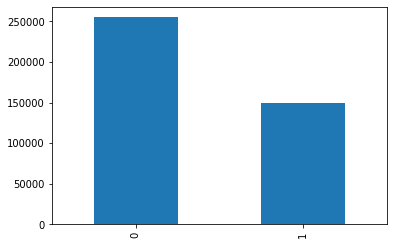

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
que_df = df.sample(30000)

In [11]:
que_df.shape

(30000, 6)

In [12]:
y = que_df['is_duplicate']

In [13]:
y

93563     0
292800    0
20928     0
271365    0
140233    0
         ..
74484     0
391698    1
58894     1
160509    0
233669    0
Name: is_duplicate, Length: 30000, dtype: int64

In [14]:
que_df = que_df[['question1', 'question2']]

In [15]:
def preprocess(q):
  q = str(q).lower().strip()

  q = q.replace('%', ' percent')
  q = q.replace('$', ' dollar ')
  q = q.replace('₹', ' rupee ')
  q = q.replace('€', ' euro ')
  q = q.replace('@', ' at ')

  contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

  q_decontracted = []

  for word in q.split():
      if word in contractions:
          word = contractions[word]

      q_decontracted.append(word)

  q = ' '.join(q_decontracted)
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("'ll", " will")
  
  # Removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()
  
  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, ' ', q).strip()

  
  return q


In [16]:
len(preprocess("<whar>do<you> want"))

7

In [17]:
que_df['question1'] = que_df['question1'].apply(preprocess)
que_df['question2'] = que_df['question2'].apply(preprocess)

In [18]:
que_df.head()

,question1,question2
93563,what do you do if you do not have a best friend,what is your best friend like
292800,why is hulk so important in the thor ragnarok...,why aren t thor and hulk in civil war the mov...
20928,how do i get my enrollment number and web acce...,can i enroll in byju s for one year course in jee
271365,does donald trump even want to be president,why does donald trump want to become president
140233,will taking 4200mg of prozac with half a fifth...,what are your experiences of prozac fluxoetin...


In [19]:
que_df['len1'] = que_df['question1'].str.len()
que_df['len2'] = que_df['question2'].str.len()

In [20]:
que_df['word_cnt1'] = que_df['question1'].apply(lambda que : len(que.split(" "))) 
que_df['word_cnt2'] = que_df['question2'].apply(lambda que : len(que.split(" ")))
que_df.head()

,question1,question2,len1,len2,word_cnt1,word_cnt2
93563,what do you do if you do not have a best friend,what is your best friend like,47,29,12,6
292800,why is hulk so important in the thor ragnarok...,why aren t thor and hulk in civil war the mov...,147,130,32,30
20928,how do i get my enrollment number and web acce...,can i enroll in byju s for one year course in jee,63,49,13,12
271365,does donald trump even want to be president,why does donald trump want to become president,43,46,8,8
140233,will taking 4200mg of prozac with half a fifth...,what are your experiences of prozac fluxoetin...,80,60,17,11


In [21]:
def common_words(row):
  w1 = set(map(lambda words : words.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda words : words.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [22]:
que_df['common'] = que_df.apply(common_words, axis=1)
que_df.head()

,question1,question2,len1,len2,word_cnt1,word_cnt2,common
93563,what do you do if you do not have a best friend,what is your best friend like,47,29,12,6,3
292800,why is hulk so important in the thor ragnarok...,why aren t thor and hulk in civil war the mov...,147,130,32,30,10
20928,how do i get my enrollment number and web acce...,can i enroll in byju s for one year course in jee,63,49,13,12,2
271365,does donald trump even want to be president,why does donald trump want to become president,43,46,8,8,6
140233,will taking 4200mg of prozac with half a fifth...,what are your experiences of prozac fluxoetin...,80,60,17,11,3


In [23]:
def total_words(row):
  w1 = set(map(lambda words : words.strip(), row['question1'].split(" ")))
  w2 = set(map(lambda words : words.strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [24]:
que_df['total_w'] = que_df.apply(total_words, axis=1)

In [25]:
que_df.head()

,question1,question2,len1,len2,word_cnt1,word_cnt2,common,total_w
93563,what do you do if you do not have a best friend,what is your best friend like,47,29,12,6,3,15
292800,why is hulk so important in the thor ragnarok...,why aren t thor and hulk in civil war the mov...,147,130,32,30,10,47
20928,how do i get my enrollment number and web acce...,can i enroll in byju s for one year course in jee,63,49,13,12,2,24
271365,does donald trump even want to be president,why does donald trump want to become president,43,46,8,8,6,16
140233,will taking 4200mg of prozac with half a fifth...,what are your experiences of prozac fluxoetin...,80,60,17,11,3,25


In [26]:
que_df['word_share'] = round(que_df['common'] / que_df['total_w'], 2)

In [27]:
que_df.head()

,question1,question2,len1,len2,word_cnt1,word_cnt2,common,total_w,word_share
93563,what do you do if you do not have a best friend,what is your best friend like,47,29,12,6,3,15,0.20
292800,why is hulk so important in the thor ragnarok...,why aren t thor and hulk in civil war the mov...,147,130,32,30,10,47,0.21
20928,how do i get my enrollment number and web acce...,can i enroll in byju s for one year course in jee,63,49,13,12,2,24,0.08
271365,does donald trump even want to be president,why does donald trump want to become president,43,46,8,8,6,16,0.38
140233,will taking 4200mg of prozac with half a fifth...,what are your experiences of prozac fluxoetin...,80,60,17,11,3,25,0.12


In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=62e9a7d96231ca78ab41efbe90806f6eb35672fe9654d43281d3765dbd34a083
  Stored in directory: /root/.cache/pip/wheels/fb/a8/64/6edcab63ec51512a87cacf9b3563c711ad6b7b05d61b704493
Successfully built distance


In [30]:
import distance
def fetch_features(row):
  q1 = row['question1']
  q2 = row['question2']

  SAFE_DIV = 0.00001
  STOP_WORDS = stopwords.words('english')
  token_features = [0.0] * 11

  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  q1_stop = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stop = set([word for word in q2_tokens if word in STOP_WORDS])

  common_word_cnt = len(q1_words.intersection(q2_words))
  common_stop_cnt = len(q1_stop.intersection(q2_stop))
  common_token_cnt = len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0] = round(common_word_cnt / (min(len(q1_words), len(q2_words)) + SAFE_DIV), 2)
  token_features[1] = round(common_word_cnt / (max(len(q1_words), len(q2_words)) + SAFE_DIV), 2)

  token_features[2] = round(common_stop_cnt / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV), 2)
  token_features[3] = round(common_stop_cnt / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV), 2)

  token_features[4] = round(common_token_cnt / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV), 2)
  token_features[5] = round(common_token_cnt / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV), 2)

  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
  token_features[9] = round((len(q1_tokens) - len(q2_tokens)) / 2, 2)

  strs = list(distance.lcsubstrings(q1, q2))
  token_features[10] = round(len(strs[0]) / (min(len(q1), len(q2)) + 1), 2)
  return token_features

In [31]:
token_features = que_df.apply(fetch_features, axis=1)

In [32]:
que_df['cwc_min']       = list(map(lambda x: x[0], token_features))
que_df['cwc_max']       = list(map(lambda x: x[1], token_features))
que_df['csc_min']       = list(map(lambda x: x[2], token_features))
que_df['csc_max']       = list(map(lambda x: x[3], token_features))
que_df['ctc_min']       = list(map(lambda x: x[4], token_features))
que_df['ctc_max']       = list(map(lambda x: x[5], token_features))
que_df['last_word_eq']  = list(map(lambda x: x[6], token_features))
que_df['first_word_eq'] = list(map(lambda x: x[7], token_features))
que_df['abs_len_diff']  = list(map(lambda x: x[8], token_features))
que_df['mean_len']      = list(map(lambda x: x[9], token_features))
que_df['lcs_ratio']     = list(map(lambda x:x[10], token_features))

In [33]:
que_df.head()

,question1,question2,len1,len2,word_cnt1,word_cnt2,common,total_w,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,lcs_ratio
93563,what do you do if you do not have a best friend,what is your best friend like,47,29,12,6,3,15,0.20,1.00,0.67,0.33,0.14,0.50,0.25,0,1,6,3.0,0.40
292800,why is hulk so important in the thor ragnarok...,why aren t thor and hulk in civil war the mov...,147,130,32,30,10,47,0.21,0.56,0.42,0.40,0.29,0.33,0.29,0,1,4,2.0,0.11
20928,how do i get my enrollment number and web acce...,can i enroll in byju s for one year course in jee,63,49,13,12,2,24,0.08,0.00,0.00,0.40,0.33,0.17,0.15,0,0,1,0.5,0.14
271365,does donald trump even want to be president,why does donald trump want to become president,43,46,8,8,6,16,0.38,0.80,0.80,0.67,0.67,0.75,0.75,1,0,0,0.0,0.41
140233,will taking 4200mg of prozac with half a fifth...,what are your experiences of prozac fluxoetin...,80,60,17,11,3,25,0.12,0.50,0.18,0.25,0.20,0.33,0.18,0,0,8,4.0,0.18


In [34]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [36]:
def fetch_fuzzy_features(row):
  q1 = row['question1']
  q2 = row['question2']
  
  fuzzy_features = [0.0]*4
  
  # fuzz_ratio
  fuzzy_features[0] = fuzz.QRatio(q1, q2)

  # fuzz_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

  return fuzzy_features

In [37]:
fuzzy_features = que_df.apply(fetch_fuzzy_features, axis=1)


In [38]:
que_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
que_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
que_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
que_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [39]:
que_df.shape

(30000, 24)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(que_df['question1']) + list(que_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [41]:
temp_df1 = pd.DataFrame(q1_arr, index= que_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= que_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [42]:
final_df = que_df.drop(columns=['question1','question2'])

In [43]:
final_df

,len1,len2,word_cnt1,word_cnt2,common,total_w,word_share,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,lcs_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
93563,47,29,12,6,3,15,0.20,1.00,0.67,0.33,...,0.25,0,1,6,3.0,0.40,55,57,58,71
292800,147,130,32,30,10,47,0.21,0.56,0.42,0.40,...,0.29,0,1,4,2.0,0.11,38,39,56,61
20928,63,49,13,12,2,24,0.08,0.00,0.00,0.40,...,0.15,0,0,1,0.5,0.14,38,43,45,48
271365,43,46,8,8,6,16,0.38,0.80,0.80,0.67,...,0.75,1,0,0,0.0,0.41,85,89,85,90
140233,80,60,17,11,3,25,0.12,0.50,0.18,0.25,...,0.18,0,0,8,4.0,0.18,37,42,35,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74484,154,62,34,13,7,36,0.19,0.75,0.25,0.57,...,0.23,1,0,17,8.5,0.17,30,45,46,79
391698,74,36,17,7,3,23,0.13,1.00,0.37,0.00,...,0.19,0,0,9,4.5,0.43,53,72,53,78
58894,82,82,18,19,10,33,0.30,0.60,0.43,0.78,...,0.56,1,0,0,0.0,0.27,56,67,70,79
160509,46,22,8,5,2,13,0.15,0.50,0.20,0.33,...,0.25,0,1,3,1.5,0.26,50,45,50,62


In [44]:
final_df = pd.concat([final_df, temp_df], axis=1)

In [45]:
final_df.shape

(30000, 6022)

In [46]:
final_df.head()

,len1,len2,word_cnt1,word_cnt2,common,total_w,word_share,cwc_min,cwc_max,csc_min,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
93563,47,29,12,6,3,15,0.20,1.00,0.67,0.33,...,0,0,0,0,0,1,0,0,0,0
292800,147,130,32,30,10,47,0.21,0.56,0.42,0.40,...,0,0,0,0,0,0,0,0,0,0
20928,63,49,13,12,2,24,0.08,0.00,0.00,0.40,...,0,0,0,0,0,0,0,0,0,0
271365,43,46,8,8,6,16,0.38,0.80,0.80,0.67,...,0,0,0,0,0,0,0,0,0,0
140233,80,60,17,11,3,25,0.12,0.50,0.18,0.25,...,0,0,0,0,0,1,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df, y ,test_size=0.2)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.785

In [49]:
def test_common_words(q1, q2):
  w1 = set(map(lambda words : words.lower().strip(), q1.split(" ")))
  w2 = set(map(lambda words : words.lower().strip(), q2.split(" ")))
  return len(w1 & w2)

In [50]:
def test_total_words(q1, q2):
  w1 = set(map(lambda words : words.strip(), q1.split(" ")))
  w2 = set(map(lambda words : words.strip(), q2.split(" ")))
  return (len(w1) + len(w2))

In [51]:
def fetch_test_features(q1, q2):
  SAFE_DIV = 0.00001
  STOP_WORDS = stopwords.words('english')
  token_features = [0.0] * 11

  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  q1_stop = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stop = set([word for word in q2_tokens if word in STOP_WORDS])

  common_word_cnt = len(q1_words.intersection(q2_words))
  common_stop_cnt = len(q1_stop.intersection(q2_stop))
  common_token_cnt = len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0] = round(common_word_cnt / (min(len(q1_words), len(q2_words)) + SAFE_DIV), 2)
  token_features[1] = round(common_word_cnt / (max(len(q1_words), len(q2_words)) + SAFE_DIV), 2)

  token_features[2] = round(common_stop_cnt / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV), 2)
  token_features[3] = round(common_stop_cnt / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV), 2)

  token_features[4] = round(common_token_cnt / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV), 2)
  token_features[5] = round(common_token_cnt / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV), 2)

  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
  token_features[9] = round((len(q1_tokens) - len(q2_tokens)) / 2, 2)

  strs = list(distance.lcsubstrings(q1, q2))
  token_features[10] = round(len(strs[0]) / (min(len(q1), len(q2)) + 1), 2)
  return token_features

In [52]:
def fetch_test_fuzzy_features(q1, q2):  
  fuzzy_features = [0.0]*4
  
  # fuzz_ratio
  fuzzy_features[0] = fuzz.QRatio(q1, q2)

  # fuzz_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

  return fuzzy_features

In [53]:
def query_point_creator(q1, q2):
  input_query = []
  q1 = preprocess(q1)
  q2 = preprocess(q2)

  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split(" ")))
  input_query.append(len(q2.split(" ")))

  input_query.append(test_common_words(q1, q2))
  input_query.append(test_total_words(q1, q2))

  input_query.append(round(input_query[4] / input_query[5], 2))
  
  token_features = fetch_test_features(q1, q2)
  input_query.extend(token_features)

  fuzzy_features = fetch_test_fuzzy_features(q1, q2)
  input_query.extend(fuzzy_features)

  q1_arr = cv.transform([q1]).toarray()
  q2_arr = cv.transform([q2]).toarray()


  return np.hstack((np.array(input_query).reshape(1, 22), q1_arr, q2_arr))

In [54]:
result = query_point_creator("who is the prime minister of India?", "who is the current prime minister of Italy?")
result.shape

(1, 6022)

In [55]:
rf.predict(query_point_creator("who is the prime minister of India?", "who is the current prime minister of India?"))

array([1])

In [56]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(rf, open('cv.pkl', 'wb'))

In [60]:
rf.save('model.h5')

AttributeError: ignored